#  Spam Email Classification Using Scikit-learn

This project builds a predictive model to classify the email messages as **Spam or Ham** using machine learning Classifier called Naive Bayes in Scikit-learn. The dataset is sourced from a public repository.


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix



In [13]:
dataset_source = "https://raw.githubusercontent.com/justmarkham/pycon-2016-tutorial/master/data/sms.tsv"
df = pd.read_csv(dataset_source, sep='\t', names=['label', 'message'])
df['label'] = df['label'].map({'ham': 0, 'spam': 1})
df.head()


,label,message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [14]:
print("Shape of dataset:", df.shape)
print("\nClass distribution:")
print(df['label'].value_counts())

Shape of dataset: (5572, 2)

Class distribution:
label
0    4825
1     747
Name: count, dtype: int64


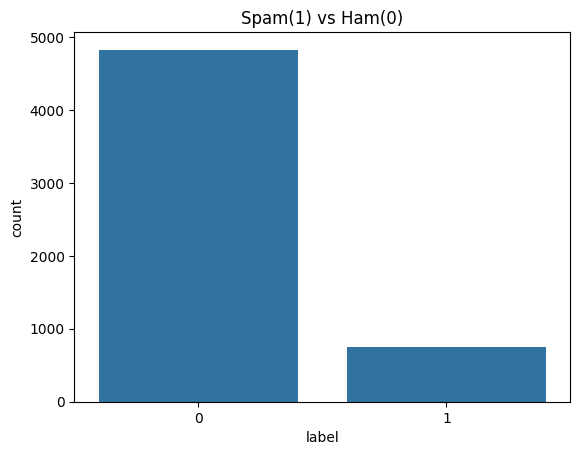

In [15]:
sns.countplot(x='label', data=df)
plt.title('Spam(1) vs Ham(0)')
plt.show()

## Splitting the Dataset
We split the dataset into training and testing sets to evaluate model performance. 80% of the data is used for training sets and 20% is used for testing sets.


In [16]:
X = df['message']
y = df['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [17]:

text_clf = Pipeline([
    ('vect', CountVectorizer()),
    ('clf', MultinomialNB())])

text_clf.fit(X_train, y_train)


Pipeline(steps=[('vect', CountVectorizer()), ('clf', MultinomialNB())])

## Model Evaluation
After training, we evaluate the model using accuracy, classification report and confusion matrix.



In [18]:
y_pred = text_clf.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.9919282511210762

Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      1.00       966
           1       1.00      0.94      0.97       149

    accuracy                           0.99      1115
   macro avg       1.00      0.97      0.98      1115
weighted avg       0.99      0.99      0.99      1115


Confusion Matrix:
 [[966   0]
 [  9 140]]


##  Real-Time User Prediction
 Allowing the user to enter the input that is a custom message and classify it using the trained model. Confidence scores for both classes are also shown.


In [19]:

user_input = input("Enter a message: ")
prediction = text_clf.predict([user_input])[0]
probs = text_clf.predict_proba([user_input])[0]
print("\nPrediction:", "Spam" if prediction else "Ham")
print(f"Confidence:- Ham: {probs[0]*100:.2f}% | Spam: {probs[1]*100:.2f}%")


Enter a message: Congrats! You won 1000

Prediction: Spam
Confidence:- Ham: 0.55% | Spam: 99.45%


## Conclusion
The model performs well in detecting spam messages using a simple yet effective text classification pipeline.